## Compare Memory-Based vs. Generator-Based Data Loading

- Download and manage satalite image datasets using Keras and Python libraries
- Compare memory-based and generator-based data loading strategies in terms of performance, memory efficiency, and implementation complexity. 
- Build a simple memory-efficient image pipeline by loading and visualizing geospatial image data sequentially
- Assess the trade-offs between loading image datasets into memory versus accessing image paths on demand.

Geospatial data analysis is highly competitive and growing sector. It is used for land cover mapping, building roads, detection, and temporal land usage monitoring, among other applications. We will build a classifier by training a model from a curated dataset. For problem formulation, we will use images to denote agricultural land vs. non-agricultural land.

#### Step 1: Install the required libraries

In [48]:
%%capture captured_output
!pip install numpy==1.26
!pip install matplotlib==3.9.2
!pip install skillsnetwork

In [49]:
output_text = captured_output.stdout
lines = output_text.splitlines()
output_last_10_lines = '\n'.join(lines[-10:])
if "error" in output_last_10_lines.lower():
    print("Library installation failed!")
    print("--- Error Details ---")
    print(output_last_10_lines)
else:
    print("Library installation was successful, let's proceed ahead")

Library installation was successful, let's proceed ahead


#### Step 2: Import libraries and packages

In [50]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork

from PIL import Image

#### The Dataset

**class_0_non_agri** is the non-agricultural land class, as defined earlier, and it represents images with non-cultivable land.

**class_1_agri**, on the other hand, is the agricultural land class, and it represents the images with cultivable land.

#### Step 3: Load images

We will use the standard approach of loading all images in memory and demonstrate how this approach is not efficent when it comes to building deep learning models for classifying images.

In [ ]:
# Define directories
extract_dir = "."

base_dir = os.path.join(extract_dir, 'images_dataSAT')
dir_non_agri = os.path.join(base_dir, 'class_0_non_agri')
dir_agri = os.path.join(base_dir, 'class_1_agri')

Start by reading in the non_agri images. First, we will use **os.scandir** to build an iterator to iterate through the *./images_dataSAT/class_0_non_agri* directory, which contains all the images with non-agriculture land. Display the fisrt 5 entries in the non_agri list.

In [52]:
non_agri = os.scandir(dir_non_agri)
# Print first 5 file paths
for f_path in range(5):
    print(next(non_agri))

<DirEntry 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_5902.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6074.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6246.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6247.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6248.jpg'>


Then, we will grab the first file in the directory.

In [53]:
file_name = next(non_agri)
file_name

<DirEntry 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6249.jpg'>

Since the directory can contain elements that are not files, we only need to read the element if it is a file.

In [54]:
os.path.isfile(file_name)

True

Get the image name.

In [55]:
image_name = str(file_name).split("'")[1]
image_name

'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6249.jpg'

Read within the image data.

In [56]:
image_data = plt.imread(os.path.join(dir_non_agri, image_name))
image_data

array([[[ 70,  68,  69],
        [ 56,  55,  53],
        [ 49,  43,  43],
        ...,
        [141, 151, 161],
        [ 80,  88,  90],
        [135, 144, 141]],

       [[ 64,  62,  63],
        [ 71,  67,  66],
        [ 81,  76,  73],
        ...,
        [213, 222, 231],
        [101, 109, 111],
        [134, 140, 136]],

       [[ 98,  94,  93],
        [106, 102,  99],
        [113, 108, 105],
        ...,
        [201, 205, 214],
        [107, 111, 112],
        [132, 137, 131]],

       ...,

       [[ 84,  84,  96],
        [ 69,  69,  81],
        [ 63,  62,  80],
        ...,
        [ 15,  24,  19],
        [ 15,  21,  21],
        [ 14,  18,  19]],

       [[ 84,  84,  94],
        [ 61,  61,  71],
        [ 70,  69,  85],
        ...,
        [ 10,  21,  15],
        [ 12,  18,  18],
        [ 12,  16,  17]],

       [[ 88,  88,  96],
        [ 59,  59,  69],
        [ 80,  79,  93],
        ...,
        [  7,  18,  12],
        [  9,  15,  15],
        [ 10,  14,  15]]

In [57]:
print(image_data.shape)

(64, 64, 3)


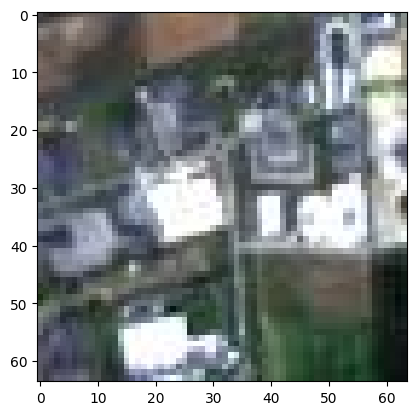

In [58]:
plt.imshow(image_data)

We will now loop through all the images in the *./images_dataSAT/class_0_non-agri* directory, read them all, and save them in the list **non_agri_images**. We will also need to note how long it takes to read all the images.

In [59]:
%%time

non_agri_images = []

for file_name in non_agri:
    if os.path.isfile(file_name):
        image_name = str(file_name).split("'")[1]
        image_data = plt.imread(os.path.join(dir_non_agri, image_name))
        non_agri_images.append(image_data)

non_agri_images = np.array(non_agri_images)


CPU times: total: 1.88 s
Wall time: 13 s


Loading images into memory is not the right approah when working with images, as it takes a long time or can quickly exhaust memory and other resources. Therefore, we will repeat the same process but save the paths to the images in a variable instead of loading and saving individual images.

Hence, instead of using **os.scandir**, we will use **os.listdir**.

In [60]:
non_agri_images = os.listdir(dir_non_agri)

# Print first 5 file paths
non_agri_images[:5]

['tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_5902.jpg',
 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6074.jpg',
 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6246.jpg',
 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6247.jpg',
 'tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6248.jpg']

Before we can show an image, we will need to open it. We can do this bu using the **Image** module in the **PIL** library. To open the first image:

In [61]:
image_data = Image.open(os.path.join(dir_non_agri, non_agri_images[0]))

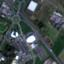

In [62]:
image_data

We will loop through all the images in the *./images_dataSAT/class_0_non_agri/* directory and add their paths. 

In [63]:
non_agri_images_paths = [os.path.join(dir_non_agri, image) for image in non_agri_images]
# Print the first five paths
non_agri_images_paths[:5]

['.\\images_dataSAT\\class_0_non_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_5902.jpg',
 '.\\images_dataSAT\\class_0_non_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6074.jpg',
 '.\\images_dataSAT\\class_0_non_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6246.jpg',
 '.\\images_dataSAT\\class_0_non_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6247.jpg',
 '.\\images_dataSAT\\class_0_non_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6248.jpg']

In [64]:
len(non_agri_images_paths)

3000

We will display the first 4 images in *./images_dataSAT/class_0_non_agri/* directory.

tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_5902.jpg


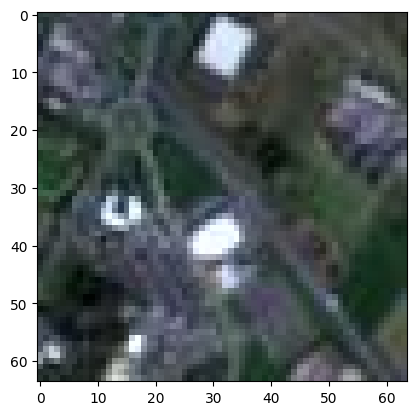

tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6074.jpg


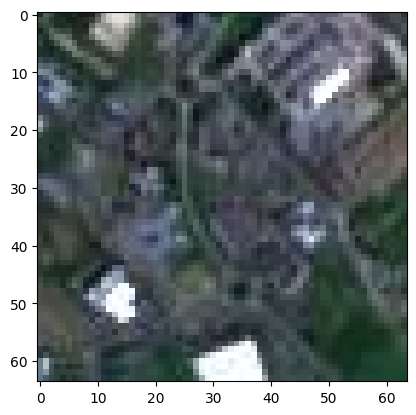

tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6246.jpg


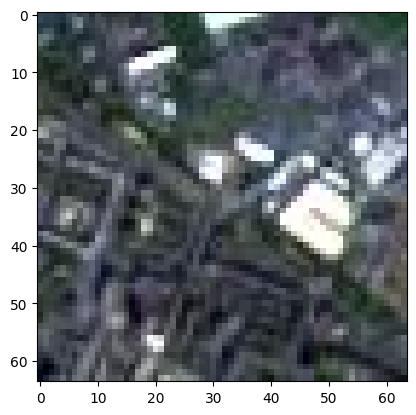

tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6247.jpg


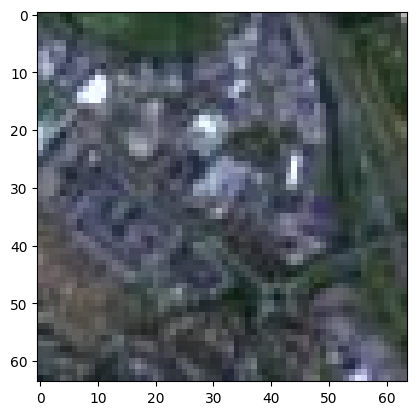

In [65]:
for image_path in non_agri_images[:4]:
    print(image_path)
    image_data = Image.open(os.path.join(dir_non_agri, image_path))
    plt.imshow(image_data)
    plt.show()

We will now save the paths to all the images in the dir_agri directory in a list called **agri_images_paths**. 

In [85]:
agri = os.listdir(dir_agri)

agri_images_paths = []

for image in agri:
    image_data = os.path.join(dir_agri, image)
    agri_images_paths.append(image_data)


agri_images_paths.sort()

# print first 5 file paths
agri_images_paths[:5]

['.\\images_dataSAT\\class_1_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_5878.jpg',
 '.\\images_dataSAT\\class_1_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_5884.jpg',
 '.\\images_dataSAT\\class_1_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6628.jpg',
 '.\\images_dataSAT\\class_1_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6629.jpg',
 '.\\images_dataSAT\\class_1_agri\\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6713.jpg']

In [86]:
print(len(agri_images_paths))

3000


We will display the first 4 images for agricultural land as well.

.\images_dataSAT\class_1_agri\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_5878.jpg


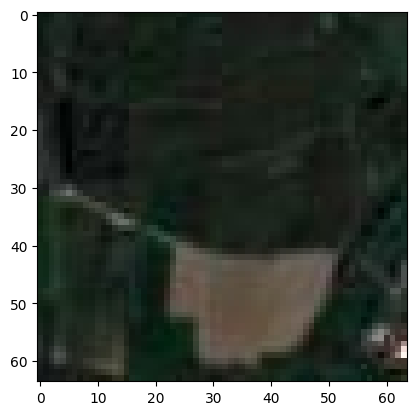

.\images_dataSAT\class_1_agri\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_5884.jpg


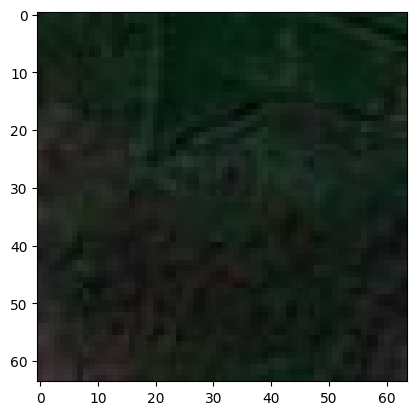

.\images_dataSAT\class_1_agri\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6628.jpg


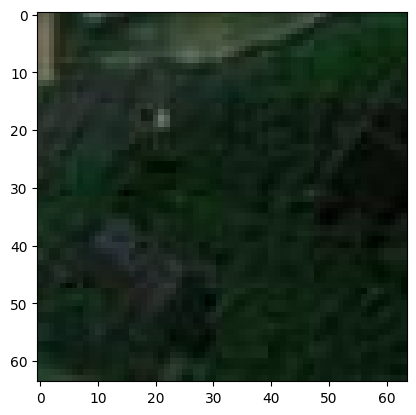

.\images_dataSAT\class_1_agri\tile_S2A_MSIL2A_20250409T105701_N0511_R094_T31UDQ_20250409T173716.SAFE_6629.jpg


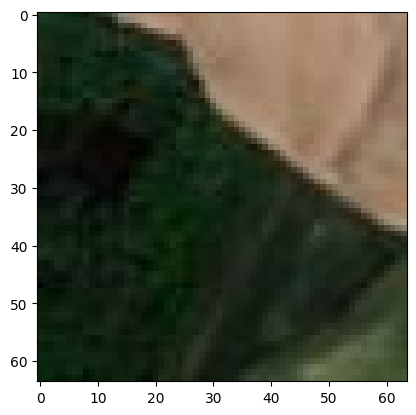

In [87]:
for image_path in agri_images_paths[:4]:
    print(image_path)
    image_data = Image.open(image_path)
    plt.imshow(image_data)
    plt.show()